# Terrorism in India - Analysis

India is home to 1.324 billion (2016) people which means 404 (people per km2), which indicates that small terror incident can claim a lot of lives in India. Thus, appropriate tools for counterterrorism should be analyzed. A common definition of terrorism is the systematic use or threatened use of violence to intimidate a population or government for political, religious, or ideological goals.  India is the third largest country which is affected by terrorism in the world. The dataset contains 10978 recorded entry in India. The aim of this notebook is to explore the dataset using data visualization techniques in order to find any possible solution which may help to prevent such type of incident in future. Feel free to suggest any changes or contribute via [GitHub](https://github.com/hell-sing).


*  Data Preprocessing   
*  General Observations    
*  Terrorist Attacks by Year    
*  Attacking Methods by Terrorists    
*  Terrorist Attacks by Target    
*  Movement of Terror Group   

###  1.1 Data Preprocessing

In [1]:
#importing required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import nltk, warnings
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from os import path

#removing warnings
warnings.filterwarnings("ignore")

#setting matplotlib for inline display of output
%matplotlib inline

In [2]:
#loading data in pandas dataframe
data = pd.read_csv("./Indiaterrorismdb2016.csv")
#checking shape of the data
row, column =  data.shape
print("Dataset contains {} rows and {} columns.".format(row,column))

Dataset contains 10978 rows and 47 columns.


In [3]:
#sorting data by year
data = data.sort_values(['year','state'],ascending=[1,1])

In [4]:
#calculating usefulness of dataframe columns
print("Usefulness % of a column in the dataset :")
round(((row - data.isnull().sum()) / row) * 100 , 2)

Usefulness % of a column in the dataset :


year                     100.00
month                    100.00
day                      100.00
foreignattackers          47.33
terrorgroup               64.37
terrorgroupdetail          6.56
state                     98.59
citytown                  94.34
latitude                  98.58
longitude                 98.58
insideoutsidecity        100.00
location                  41.15
summary                   73.92
attacksuccess            100.00
suicidemission           100.00
attacktype1               97.24
attacktype2                6.68
attacktype3                0.45
targtype1                 95.16
targetdetail1             92.93
targetdetail2             63.96
targetdetail3             95.23
targetdetail4              5.42
targetdetail5              5.16
targetdetail6              3.00
targetdetail7              5.33
attackmotive              21.26
noofattackers             19.57
noofattackerscaptured     70.82
weaptype1                 92.28
weapsubtype1              90.39
weaptype

Since all of the data belong to real incidents and contain nonnumeric values, finding usefulness in percentages can help us to identify which fields should be used for analysis. Field with a lot of empty values does not provide much information about trends over time, with some exceptions. 

In [5]:
#deleting less usefull columns in the dataframe
data = data.drop(['terrorgroupdetail','location','summary','attacktype2','attacktype3','targetdetail1',
                  'targetdetail2','targetdetail3','targetdetail4','targetdetail5','targetdetail6','targetdetail7',
                  'noofattackerscaptured','weapsubtype1', 'weaptype2', 'weapsubtype2', 'weaptype3','weapsubtype3',
                  'weapdetail','noofattackerskilled','noofattackerswounded','propertydamaged','propertycomment',
                  'hostageskidnapped','hostagekepthours', 'ransomdemanded', 'fateofhostages',
                  'noofhostagesreleased'],axis=1)
data.shape

(10978, 19)

In [6]:
#renaming columns for easy handling
data.columns = ['Year', 'Month', 'Day', 'Foreign_Attackers', 'Terror_Group','State','City','Latitude',
                'Longitude','Inside_Outside_City','Attack_Success','Suicide_Mission','Attack_Type',
                'Target_Type', 'Attack_Motive','No_of_Attackers', 'Weapon_Type','Victims_Killed','Victims_Wounded']

In [7]:
#creating new column 'Victims' using 'Victims_Killed' and 'Victims_Wounded'
data['Victims_Killed'] = data['Victims_Killed'].fillna(0).astype(int)
data['Victims_Wounded'] = data['Victims_Wounded'].fillna(0).astype(int)
data['Victims'] = data['Victims_Killed'] + data['Victims_Wounded']

### 1.2 General Observations

In [8]:
#checking facts using dataset
print("Year with maximum number of attacks in India is {}.".format(data['Year'].max()))
print("Maximum number of incident took place in {} with {} attacks in last 45 years."
      .format(data['State'].value_counts().index[0],data['State'].value_counts().values[0]))
print("Most naturious group is {} which has shown there activity {} times."
      .format(data['Terror_Group'].value_counts().index[0],data['Terror_Group'].value_counts().values[0]))
print("Attackers favorite spot is {} which is mostly targeted by {}.".format(data['City'].value_counts().index[0],
      data[data['City']==data['City'].value_counts().index[0]].Terror_Group.value_counts().index[0]))
print("Success rate of attacks in India is {} %."
      .format(round((data.groupby('Attack_Success').Victims.count()/data.groupby('Attack_Success').Victims.count().sum()*100).values[1])))

Year with maximum number of attacks in India is 2016.
Maximum number of incident took place in Jammu and Kashmir with 2197 attacks in last 45 years.
Most naturious group is Communist Party of India - Maoist (CPI-Maoist) which has shown there activity 1765 times.
Attackers favorite spot is Srinagar which is mostly targeted by Muslim Separatists.
Success rate of attacks in India is 86.0 %.


In [9]:
#creating new dataframe based on 'Attack_Motive' column
attack_motive = data[~data['Attack_Motive'].isnull()]

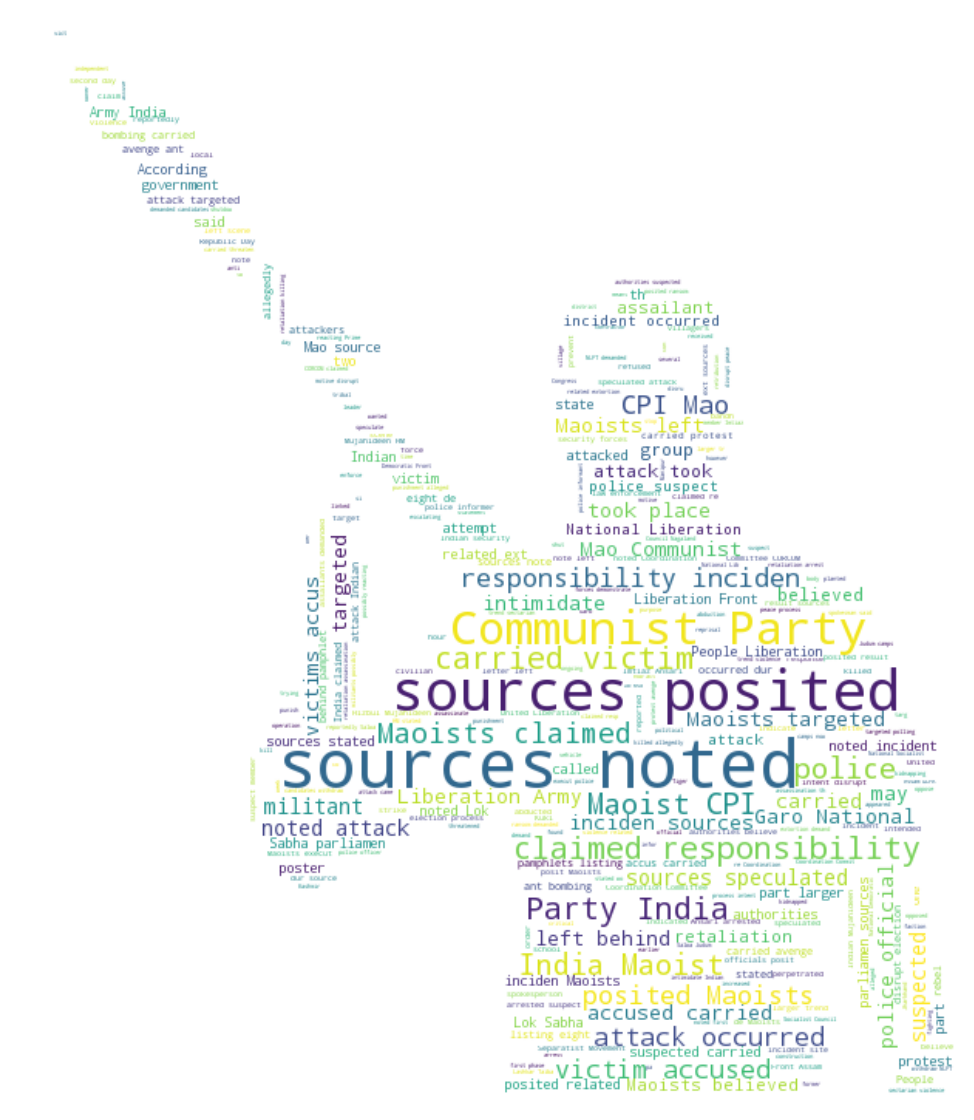

In [10]:
#generating word cloud using Attack Motive
background_image = np.array(Image.open(path.join(path.dirname('./'), "image.png")))
wc = WordCloud(background_color="white", max_words=2000,mask = background_image ,stopwords=set(STOPWORDS))
wc.generate(attack_motive['Attack_Motive'].to_string())
plt.figure(figsize=(20,20)), plt.axis("off")
plt.imshow(wc, interpolation='bilinear');

Terrorism found in India includes ethnic-nationalist terrorism, religious terrorism, left-wing terrorism, and narco-terrorism. India has witnessed the most number of attack in last year (2016) which is clearly an alarming situation. Most number of attacks is done by Maoist ie left-wing terrorism, this form of terror focuses on economic ideology, where all the existing socio-political structures are seen to be economically exploitative in character and a revolutionary change through violent means is essential. Above word cloud clearly shows that left-wing terrorism which mostly includes Indian people is in lead, this may be the reason that success rate of attack is such high as 86% in India. Another type of terrorism that India has witnessed is religious terrorism and ethnic-nationalist which is seen in Northan part of India mostly, like Jammu and Kashmir which has been attacked 2197 times in last 45 years.

### 2.1 Terrorist Attacks by Year

In [11]:
#checking range in which data is collected
print("Data is from year {} till year {}.".format(data['Year'].max(),data['Year'].min()))

Data is from year 2016 till year 1972.


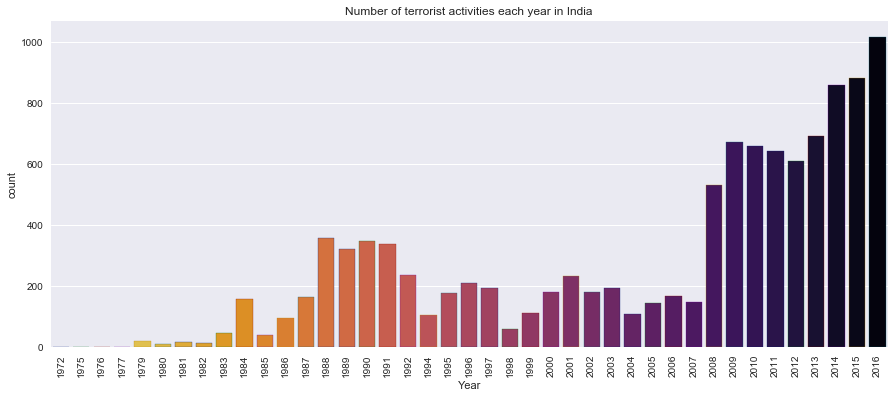

In [12]:
#plotting terrorist attacks happened each year
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=data, palette='inferno_r',edgecolor=sns.color_palette('dark',7))
plt.title('Number of terrorist activities each year in India')
plt.xticks(rotation=90)
plt.show()

India’s battle with terrorism has been a long and hard one. A country with the complex socio-economic situation, terrorism has plagued the country since Independence. Above plot clearly shows that terrorism is always an issue in India and continuously rising in India. In last 8 years, we have seen a high growth in terrorist activity, which is much greater than previous activities. From the graph, we can see that India has witnessed such growth earlier in 1987-1994 this may be due to ethnic-nationalist terrorism in Punjab. India clearly needs strong and reliable methods to deal with rising terrorism.

In [13]:
#function to plot map of india and number of victims per event
def make_map(axis,dataframe,title,colour):
    india = Basemap(ax=axis, resolution='c',llcrnrlon=67.37, llcrnrlat= 5.54, urcrnrlon=98.05, urcrnrlat=36.4)
    india.drawcoastlines(color='#555566', linewidth=1)
    india.drawcountries(color='#555566', linewidth=1)
    india.drawmapboundary(fill_color='lightblue')
    india.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
    axis.scatter(dataframe['Longitude'], dataframe['Latitude'], dataframe['Victims'],c=colour,alpha=0.5, zorder=10)
    axis.set_xlabel(title)

In [14]:
#defining different ranges
year_a = data[(data['Year'])>2010]
year_b = data[((data['Year'])<2010) & ((data['Year'])>2005)]
year_c = data[((data['Year'])<2005) & ((data['Year'])>1995)]
year_d = data[((data['Year'])<1995) & ((data['Year'])>1985)]
year_e = data[((data['Year'])<1987)]

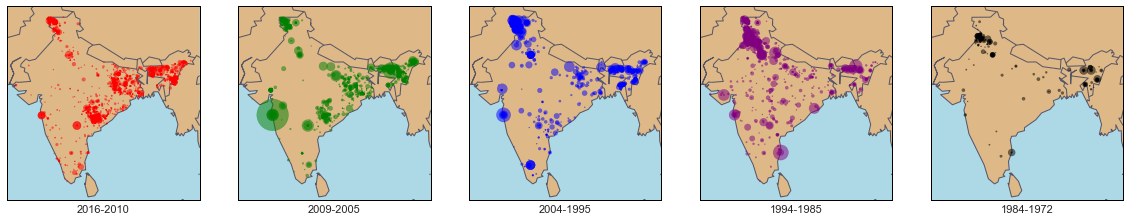

In [15]:
#generating plots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(20,10))
make_map(ax1,year_a,'2016-2010','red')
make_map(ax2,year_b,'2009-2005','green')
make_map(ax3,year_c,'2004-1995','blue')
make_map(ax4,year_d,'1994-1985','purple')
make_map(ax5,year_e,'1984-1972','black')

The maps above shows all terrorist attacks per location, where the color is determined by location and circle size is determined by the number of victims in that incident. The map is divided into five segments.

* We can notice that north and north-east region of the county is having constant trouble since 1972.
* We can see that there is an increase in terrorist attacks in West Bengal, Chhattisgarh, Orissa, and Bihar.
* Frequency and spread of attack is definitely increased which suggest that terrorist is now targeting all parts of India unlike before.

In [16]:
# plt.subplots(figsize=(15,6))
# sns.set_style("darkgrid")
# plt.plot(data['Year'],data['Victims']);
# plt.title('Number of Victims due to Terrorist Activity')
# plt.show()

### 2.2 Attacking Methods by Terrorists

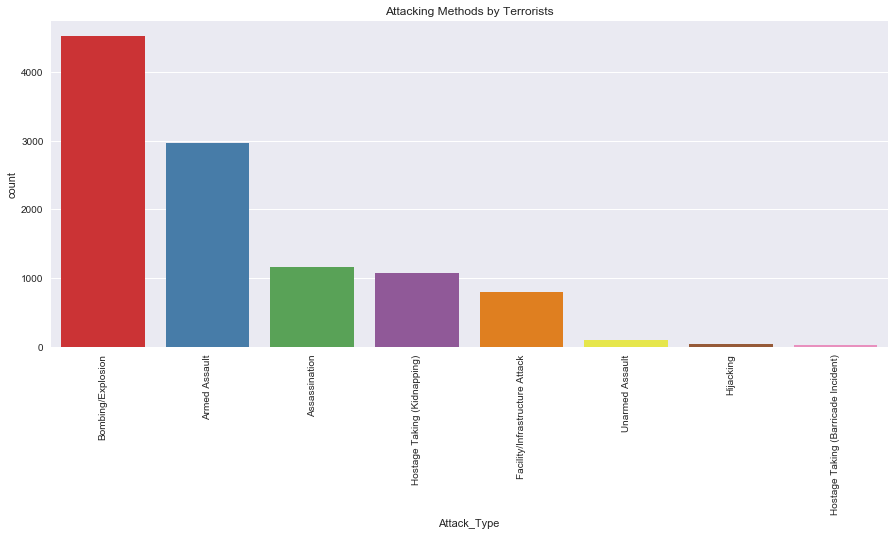

In [17]:
plt.subplots(figsize=(15,6))
sns.countplot('Attack_Type',data=data, palette='Set1', order= data['Attack_Type'].value_counts().index)
plt.title('Attacking Methods by Terrorists')
plt.xticks(rotation=90)
plt.show()

The graph above shows that Bombing/Explosion, Armed Assault, and Assassination are the top three attacking methods used by Terrorists. In which is Bombing/Explosion is most used methods by Terrorist, as they are weapons of mass killing and easy to operate, unlike armed assault and assassination.

**Conclusion A** _In order to stop Bombing/Explosion and Armed Assault we need to introduce proper checkpoints throughout the country as well as bomb disposal squad, as they are most used methods weapon by the terrorist. _

In [18]:
attack_type = data[data.Attack_Type.isin(['Armed Assault','Bombing/Explosion','Assassination'])]

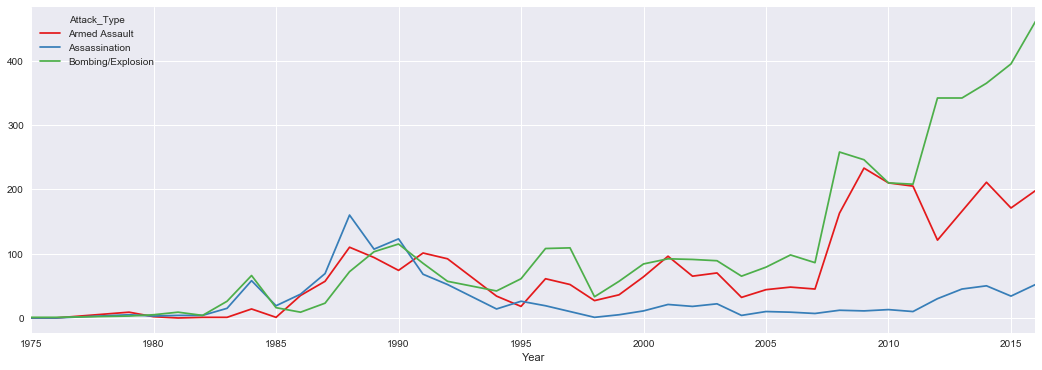

In [19]:
attack_type_data= pd.crosstab(attack_type.Year,attack_type.Attack_Type)
attack_type_data.plot(color=sns.color_palette('Set1',18))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [20]:
print(round(data.groupby('Attack_Type').Victims.count()/data.groupby('Attack_Type').Victims.count().sum()*100,2))

Attack_Type
Armed Assault                          27.74
Assassination                          10.85
Bombing/Explosion                      42.30
Facility/Infrastructure Attack          7.43
Hijacking                               0.35
Hostage Taking (Barricade Incident)     0.26
Hostage Taking (Kidnapping)            10.07
Unarmed Assault                         1.00
Name: Victims, dtype: float64


Indeed, it is true that Bombing and Explosion are used as a weapon of mass killing, 42% of all the victims are due to Bombing/Explosion, and 27% are due to Armed Assult. Both when combined create 69% which suggest that just dealing with Bombing-Explosion and Armed Assult can bring down terrorism in huge amount. With plot, we can confirm that with proper checkpoints and explosive detector in the country we can decrease terrorist attacks in the county.

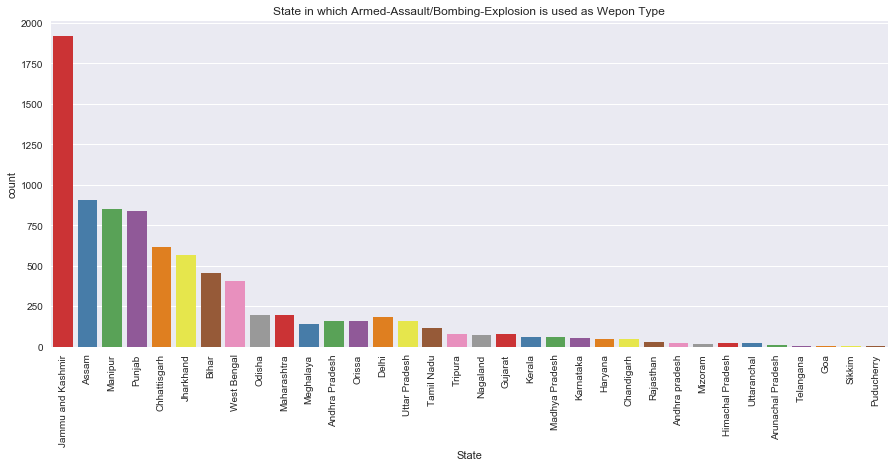

In [21]:
plt.subplots(figsize=(15,6))
sns.countplot('State',data=attack_type, palette='Set1', order= data['State'].value_counts().index)
plt.title('State in which Armed-Assault/Bombing-Explosion is used as Wepon Type')
plt.xticks(rotation=90)
plt.show()

### 2.3 Involvement of Foreign Attackers

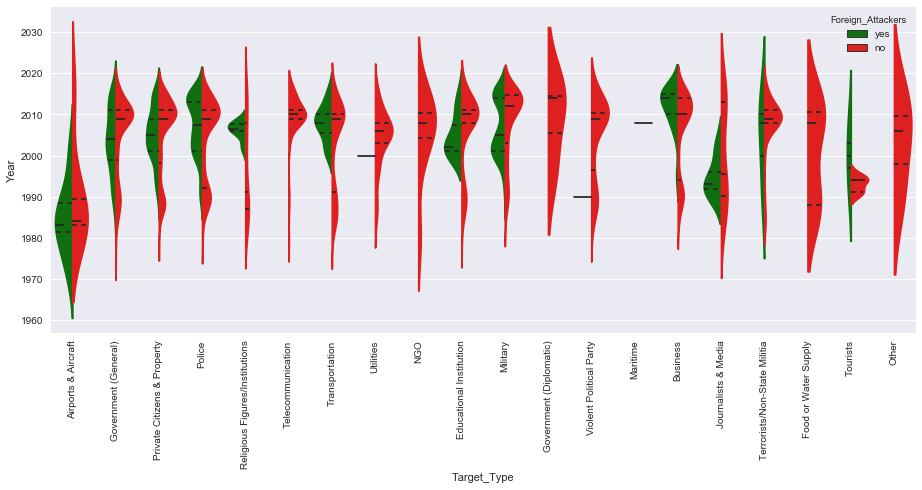

In [22]:
sns.violinplot(x="Target_Type", y="Year", hue="Foreign_Attackers", data=data,
               split=True, inner="quart", palette={"yes": "g", "no": "r"})
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(15.5,6)

Above violinplot shows that favorite target of Foreign Attackers includes those things which either affects directly to the general public like private citizens, property, Media, Police, and Military or indirectly like targeting administration, Government, Transportation, Business, Educational Institutions. Appart from killing their motto is to disturb the functioning of the Government and produce fear in the common citizen.

In [23]:
foreign_attackers = data[data.Foreign_Attackers.isin(['yes'])]

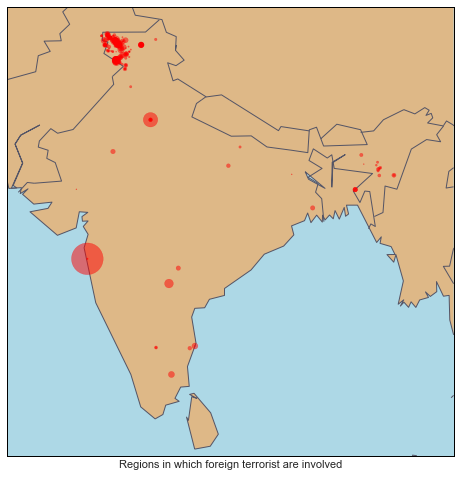

In [24]:
fig, axis = plt.subplots(figsize=(8,10))
india = Basemap(ax=axis, resolution='c',llcrnrlon=67.37, llcrnrlat= 5.54, urcrnrlon=98.05, urcrnrlat=36.4)
india.drawcoastlines(color='#555566', linewidth=1)
india.drawcountries(color='#555566', linewidth=1)
india.drawmapboundary(fill_color='lightblue')
india.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
axis.scatter(foreign_attackers['Longitude'], foreign_attackers['Latitude'],
             foreign_attackers['Victims'],c='red',alpha=0.5, zorder=10)
axis.set_xlabel('Regions in which foreign terrorist are involved');

Regions which are victims of cross-border terrorism is shown in the above plot. Jammu and Kashmir is a key victim of there type of Terrorist Activities. We can also notice that there are some incidents in Uttar Pradesh, Bihar, West Bengal. North-East region is also affected by cross-border terrorism. Neighbouring countries involved in these activities are Pakistan, Nepal, Bangladesh, and Myanmar.

**Conclusion B** _Some parts of the country are frequent victims of cross-border terrorism, in order to bring down these numbers we need better border security around these areas._

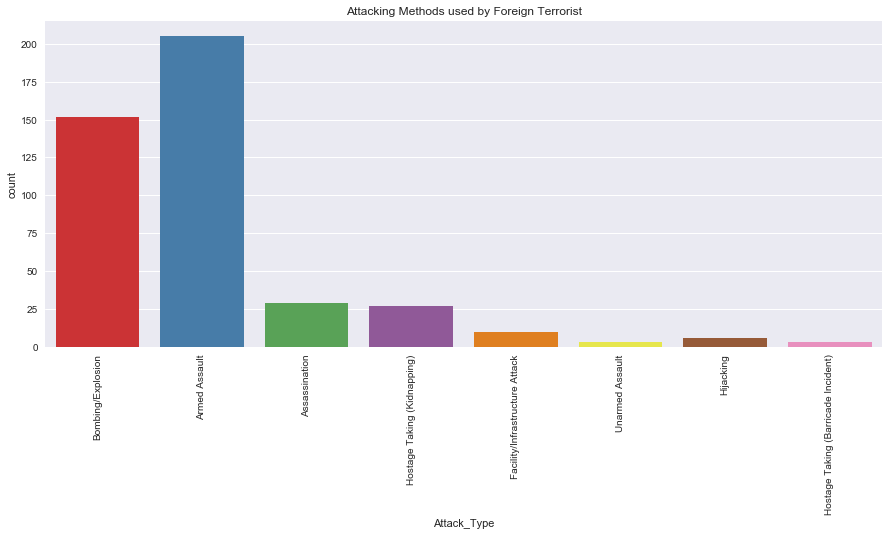

In [25]:
plt.subplots(figsize=(15,6))
sns.countplot('Attack_Type',data=foreign_attackers, palette='Set1', order= data['Attack_Type'].value_counts().index)
plt.title('Attacking Methods used by Foreign Terrorist')
plt.xticks(rotation=90)
plt.show()

The most used method is Bombing-Explosion and Armed Assault, since all the plotted data is of Foreign Terrorist we can say that either these terrorist bring weapons with them which means we need better border security or they are helped by people inside India which means we need better intel or in worst case both of them are true.

### Terrorist Groups

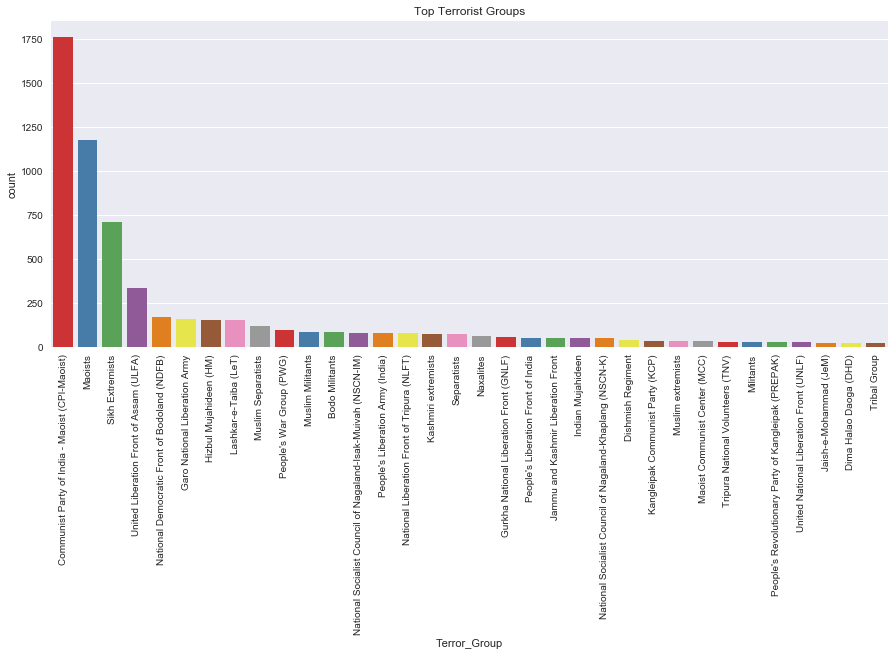

In [26]:
plt.subplots(figsize=(15,6))
sns.countplot('Terror_Group',data=data, palette='Set1', order= data['Terror_Group'].value_counts().index[:34])
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups')
plt.show()

In [27]:
top_list = list(data['Terror_Group'].value_counts().index[:8])
print("These are the top terrorist groups which have shown there activity in India :",','.join(top_list))

These are the top terrorist groups which have shown there activity in India : Communist Party of India - Maoist (CPI-Maoist),Maoists,Sikh Extremists,United Liberation Front of Assam (ULFA),National Democratic Front of Bodoland (NDFB),Garo National Liberation Army,Hizbul Mujahideen (HM),Lashkar-e-Taiba (LeT)


In [28]:
top_group = data[data.Terror_Group.isin(data['Terror_Group'].value_counts().index[:8])]

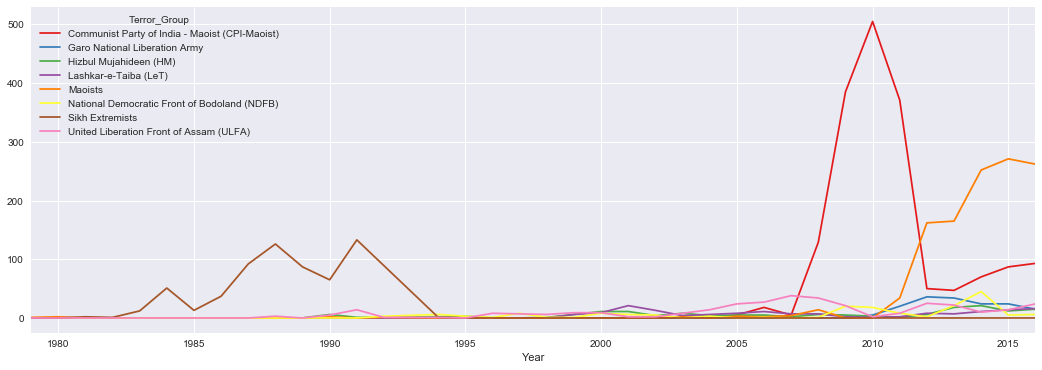

In [29]:
terror_region=pd.crosstab(top_group.Year,top_group.Terror_Group)
terror_region.plot(color=sns.color_palette('Set1',18))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

Every group is fighting their own battle in their own region. We can define Terror Group into two categories:
* Those that have shown their activity in past but in recent years they have not shown their activity, like Sikh Extremists.
* Those group which is active, creating trouble and have been involved in recent terror activities like CPI/Maoist, GNLA, ULFA, LeT, and HM.

In [30]:
#defining different ranges
group_a = data[(data['Terror_Group']=='Communist Party of India - Maoist (CPI-Maoist)') | (data['Terror_Group']=='Maoists')]
group_b = data[(data['Terror_Group']=='National Democratic Front of Bodoland (NDFB)') | (data['Terror_Group']=='United Liberation Front of Assam (ULFA)')]
group_c = data[data['Terror_Group']=='Sikh Extremists']
group_d = data[data['Terror_Group']=='Lashkar-e-Taiba (LeT)']
group_e = data[data['Terror_Group']=='Hizbul Mujahideen (HM)']

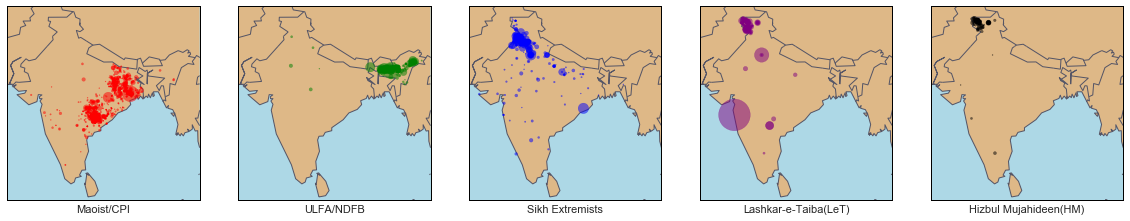

In [31]:
#generating plots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(20,10))
make_map(ax1,group_a,'Maoist/CPI','red')
make_map(ax2,group_b,'ULFA/NDFB','green')
make_map(ax3,group_c,'Sikh Extremists','blue')
make_map(ax4,group_d,'Lashkar-e-Taiba(LeT)','purple')
make_map(ax5,group_e,'Hizbul Mujahideen(HM)','black')

### Terrorist Attacks based on States

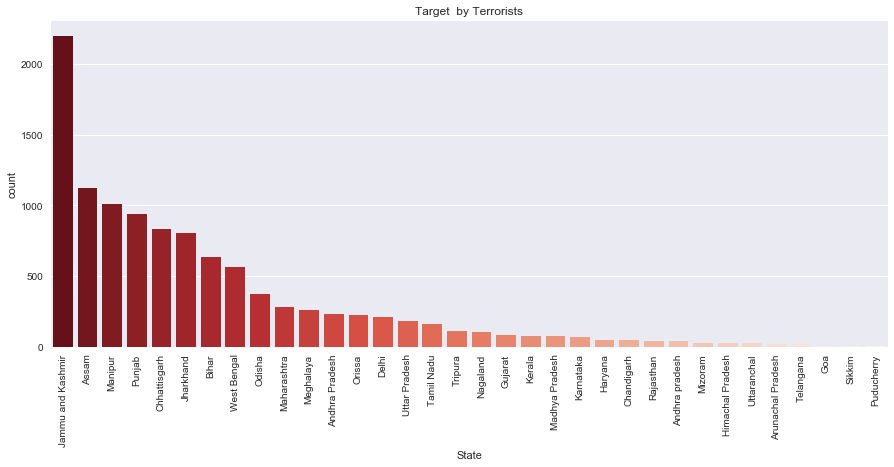

In [32]:
plt.subplots(figsize=(15,6))
sns.countplot('State',data=data, palette='Reds_r', order= data['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Target  by Terrorists')
plt.show()

In [34]:
top_state = data[data.State.isin(data['State'].value_counts().index[:8])]

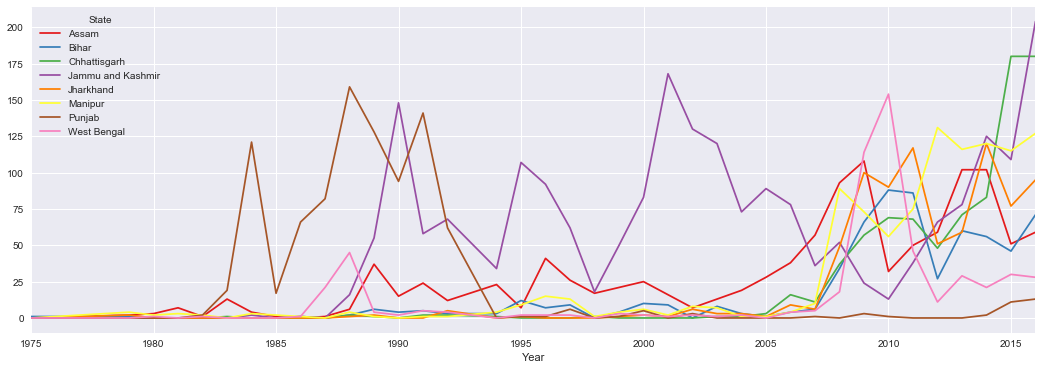

In [35]:
terror_region=pd.crosstab(top_state.Year,top_state.State)
terror_region.plot(color=sns.color_palette('Set1',18))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

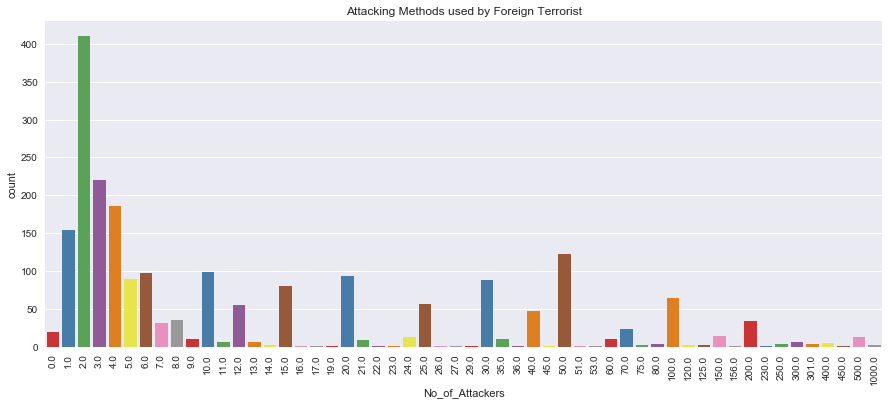

In [36]:
plt.subplots(figsize=(15,6))
sns.countplot('No_of_Attackers',data=data, palette='Set1')
plt.title('Attacking Methods used by Foreign Terrorist')
plt.xticks(rotation=90)
plt.show()

In [37]:
mass_attacker = data[data['No_of_Attackers']>200]

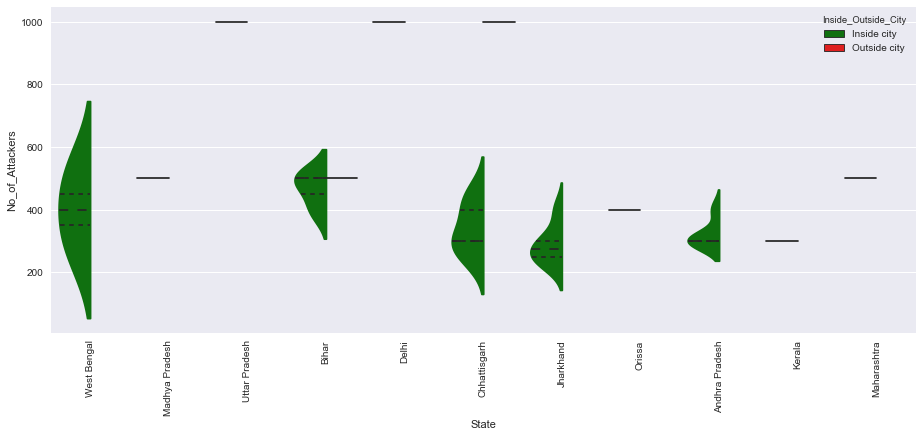

In [38]:
sns.violinplot(x="State", y="No_of_Attackers", hue="Inside_Outside_City", data=mass_attacker,
               split=True, inner="quart", palette={"Inside city": "g", "Outside city": "r"})
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(15.5,6)

**Conclusion C: ** _Mass attacking is trend in some part of India like West Bengal, Bihar, Chhattisgarh, and Andhra Pradesh, in such are we are required to introduce same type of response weapons which can help us to deal with mass attacking._

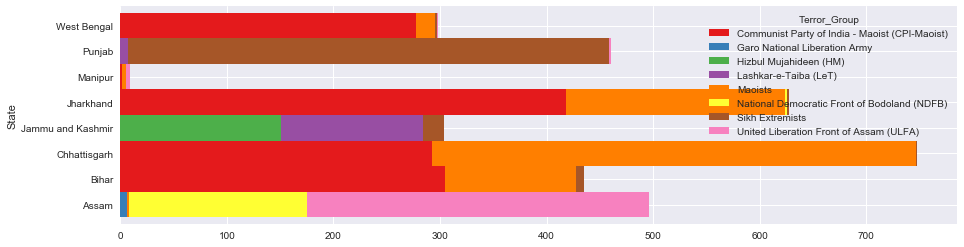

In [39]:
pd.crosstab(top_state.State,top_group.Terror_Group).plot.barh(stacked=True,width=1,color=sns.color_palette('Set1',9))
figure = plt.gcf()
figure.set_size_inches(15,4)
plt.show()

Data form India Government website about Literacy rate, poverty and Unemployment is shown below and we can note that state with such problems also has higher Terrorism in their state. 

* **State with lowest literacy rate:** Bihar, Telangana, Arunachal Pradesh, Andhra Pradesh, Jharkhand, Jammu & Kashmir, Chhattisgarh, Assam, Odisha.


* **State with the highest poverty:** Chhattisgarh, Dadra and Nagar Haveli, Jharkhand, Manipur, Arunachal Pradesh, Bihar, Odisha, Assam.


* **State with the highest unemployment:** Tripura, Sikkim, Himachal Pradesh, Arunachal Pradesh, Nagaland, Jharkhand, Jammu, and Kashmir.

**Conclusion D: ** _Improvement in literacy rate and poverty can help us to deal with terrorism in Bihar, Jharkhand, Odisha, Chhattisgarh, and Assam._

**Conclusion E: ** _Improvement in literacy rate and employment can help us to deal with terrorism in Jammu and Kashmir._

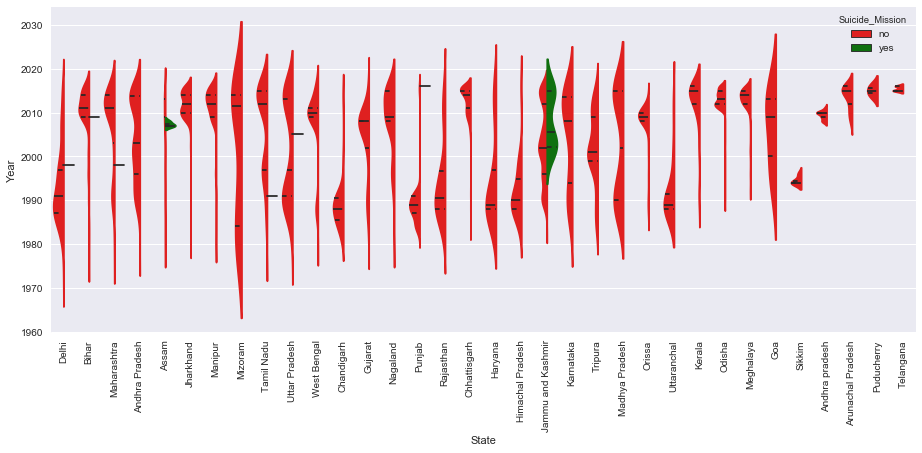

In [40]:
sns.violinplot(x="State", y="Year", hue="Suicide_Mission", data=data,
               split=True, inner="quart", palette={"yes": "g", "no": "r"})
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(15.5,6)

**Conclusion F: ** _In Jammu and Kashmir, terrorists have history of using Suicide Bombing as a method of terrorism. Thus mass gathering of the public should not be allowed in Jammu and Kashmir._

### Conclusions 

*  In order to stop Bombing/Explosion and Armed Assault we need to introduce proper checkpoints throughout the country as well as bomb disposal squad, as Bombing/Explosion and Armed Assault are most used methods weapon by the terrorist.
* Some parts of the country are frequent victims of cross-border terrorism, in order to bring down these numbers we need better border security around these areas.
* Improvement in literacy rate and employment can help us to deal with terrorism in Jammu and Kashmir.
* Improvement in literacy rate and poverty can help us to deal with terrorism in Bihar, Jharkhand, Odisha, Chhattisgarh, and Assam.
* Mass attacking is trend in some part of India like West Bengal, Bihar, Chhattisgarh, and Andhra Pradesh, in such are we are required to introduce same type of response weapons which can help us to deal with mass attacking.
* In Jammu and Kashmir, terrorists have history of using Suicide Bombing as a method of terrorism. Thus mass gathering of the public should not be allowed in Jammu and Kashmir.